# PIV analysis

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 9

In [2]:
#import json
#from scipy import stats
#import scipy.interpolate as interp
#import sys
#sys.path.append('/home/claudio/Documents/Atos/pyModules')

In [3]:
from skimage import io
from skimage import exposure
from skimage.morphology import disk
from skimage.filters.rank import maximum, minimum
from skimage.filters import gaussian
from skimage import img_as_ubyte, img_as_float

## Read images

In [4]:
im_a = io.imread('./images/naca23012_dinamico_24deg_fin1_1_a.bmp', as_grey=True)
im_b = io.imread('./images/naca23012_dinamico_24deg_fin1_1_b.bmp', as_grey=True)

In [5]:
img = [[im_a, 'Image A'], [im_b, 'Image B']]

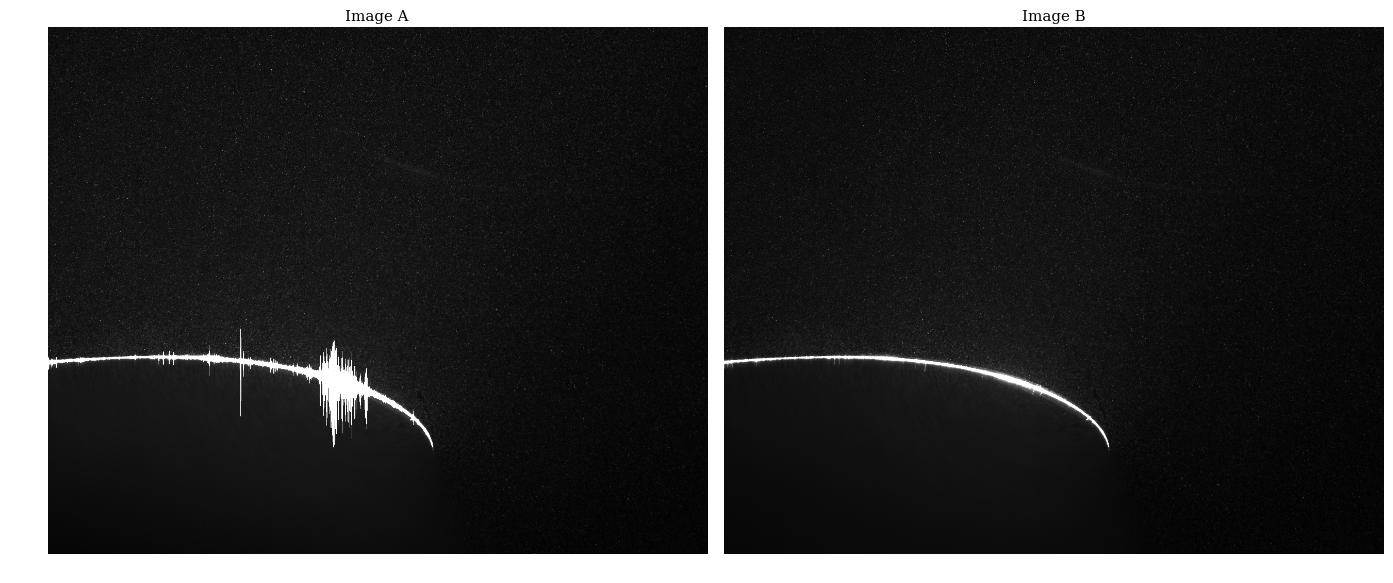

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True, subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

for i in range(2):
    ax[i].imshow(img[i][0], cmap=plt.cm.gray)
    ax[i].set_title(img[i][1])

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

Size of images

In [7]:
im_a.shape

(1024, 1280)

# Preprocess

## Histogram

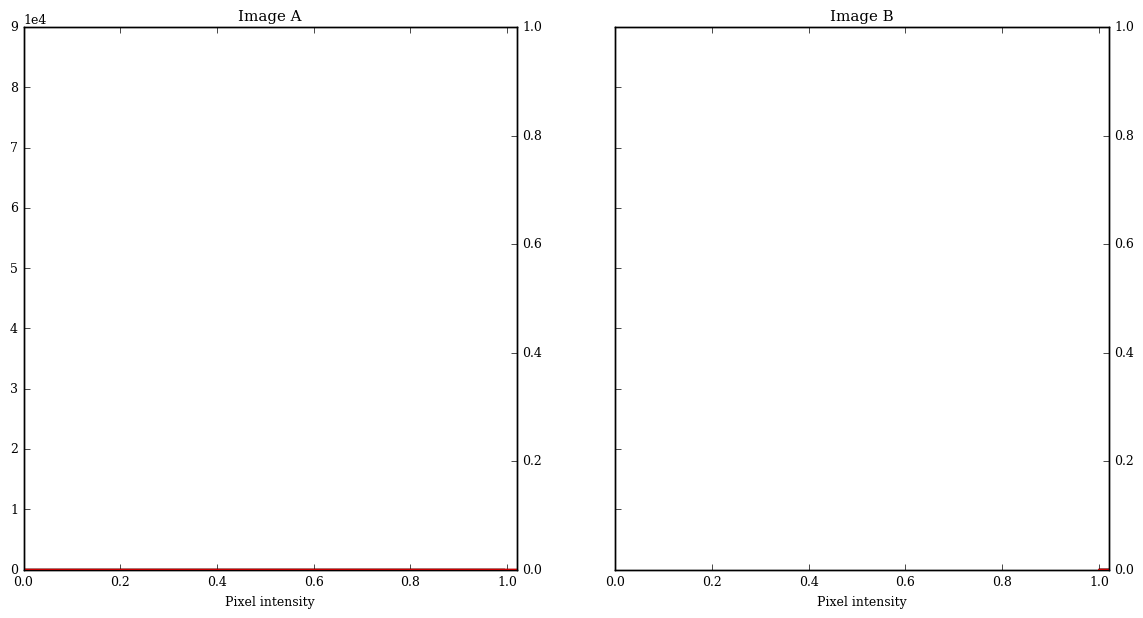

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True, subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()
bins = 256



for i in range(2):
    ax_cdf = ax[i].twinx()
    ax[i].hist(img[i][0].ravel(), bins=bins)
    ax[i].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax[i].set_xlabel('Pixel intensity')
    ax[i].set_xlim(0, 1.02)
    ax[i].set_title(img[i][1])
    img_cdf, bins1 = exposure.cumulative_distribution(img[i][0], bins)
    ax_cdf.plot(bins1, img_cdf, 'r')


## Min Max Filter

In [9]:
img_f = []

for i in range(2):
    ul = maximum(img[i][0], disk(5))
    #ul = gaussian(ul, sigma=1. , mode='constant')
    il = minimum(img[i][0], disk(5))
    #il = gaussian(il, sigma=1. , mode='constant')
    img[i].append((img[i][0] - il)/(ul - il))

/home/claudio/.local/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide


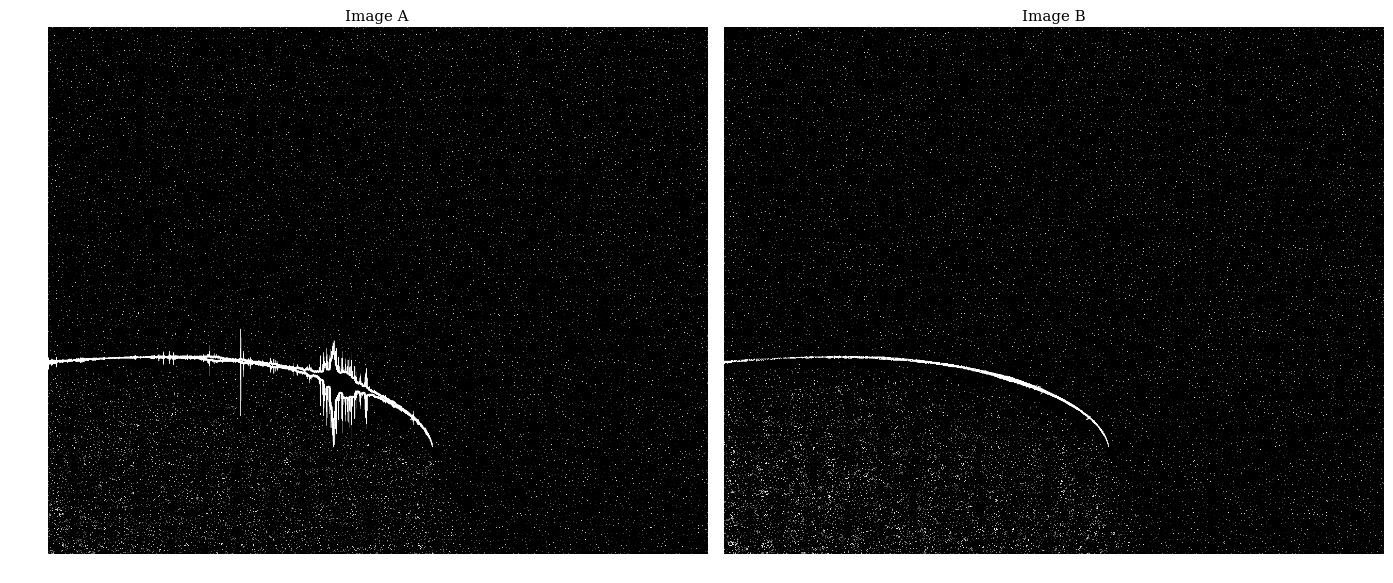

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True, subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

for i in range(2):
    ax[i].imshow(img[i][2], cmap=plt.cm.gray)
    ax[i].set_title(img[i][1])

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

## Histogram
compute histograms of filtered images

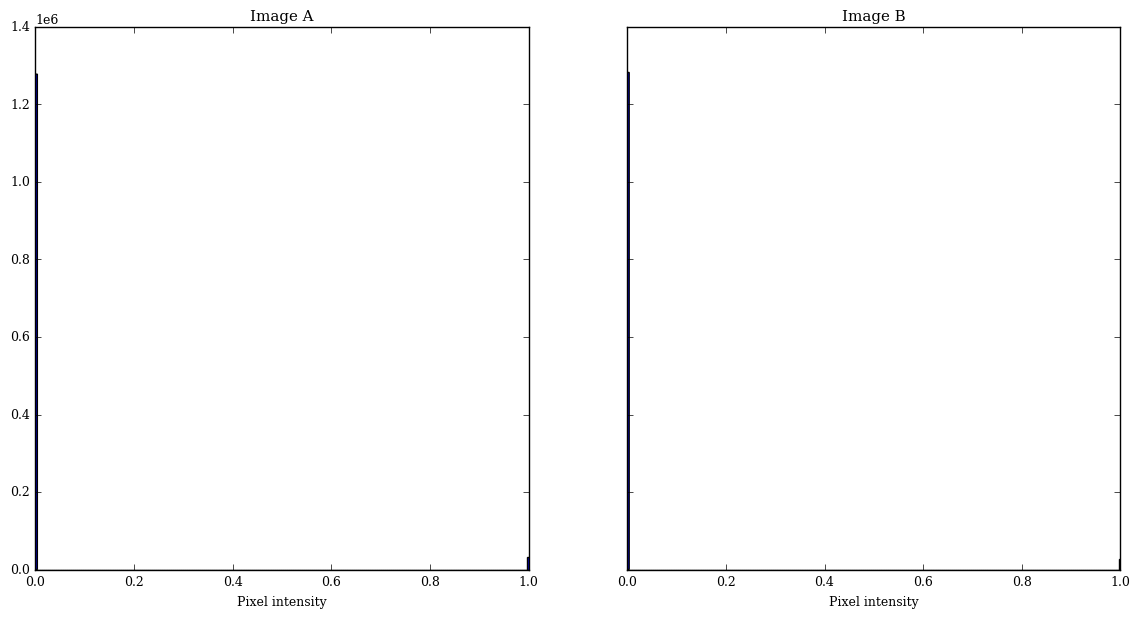

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True, subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()
bins = 256



for i in range(2):
    #ax_cdf = ax[i].twinx()
    ax[i].hist(img[i][2].ravel(), bins=bins)
    ax[i].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax[i].set_xlabel('Pixel intensity')
    #ax[i].set_xlim(0, 260)
    ax[i].set_title(img[i][1])
    #img_cdf, bins1 = exposure.cumulative_distribution(img[i][2], bins)
    #ax_cdf.plot(bins1, img_cdf, 'r')


# Correlation